In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# bias term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [7]:
# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
# cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    return -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

In [9]:
# gradient descent
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_history = []

    for _ in range(iterations):
        gradients = (1/m) * X.T.dot(sigmoid(X.dot(theta)) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

In [10]:
# training
theta, cost_history = gradient_descent(X_train_b, y_train, learning_rate=0.1, iterations=1000)

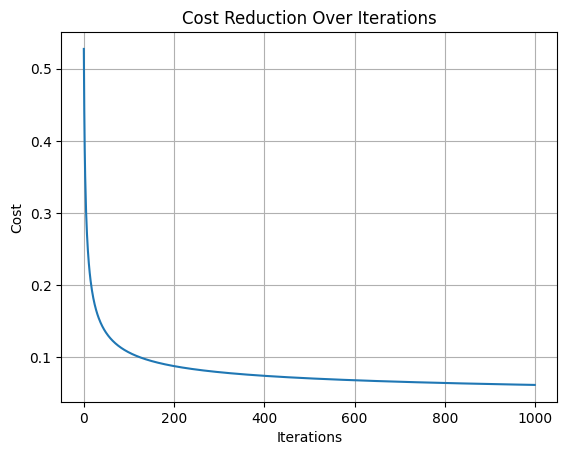

In [11]:
plt.plot(cost_history)
plt.title("Cost Reduction Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

In [12]:
def predict(X, theta, threshold=0.5):
    probs = sigmoid(X.dot(theta))
    return (probs >= threshold).astype(int)

In [13]:
# accuracy
y_pred = predict(X_test_b, theta)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 98.25%
